# **Problem Statement**
**Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.**

# **Data Description** 

**The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.**

# **NYC Taxi Data.csv - the training set (contains 1458644 trip records)**

**Data fields**

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds **bold text**


In [2]:
# Importing the library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
data1=pd.read_csv("/gdrive/My Drive/Colab Notebooks/AlmaBetter/Capestone2/NYC Taxi Data.csv")

In [5]:
data1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
data1.shape

(1458644, 11)

In [8]:
data1.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Pasenger count varies from 0 to 9.
Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. so as we can  see there is significant diffrence between minimum and maximum values so there must be outliers in the feature , So we will deal with them as well.

In [9]:
data1.drop_duplicates(inplace=True)
data1.shape

(1458644, 11)

as we can see that after removing the duplicate values the shape of the dataset remains same as original dataset. So we can conclude that dataset does'nt contain duplicate values.

In [10]:
data1['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

as we can see that there are 60 observations in the dataset which has 0 passanger , so that does'nt make sense b/s we can't predict anything with 0 passanger, so we are removing the rows which has 0 passanger counts.

In [11]:
data1=data1[data1["passenger_count"]!=0]

In [12]:
data1.shape

(1458584, 11)

In [13]:
data1['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [14]:
data1["pickup_datetime"][0]

'2016-03-14 17:24:55'

As we can see above the "pickup_datetime" and "dropoff_datetime" should be in datetime fromat  but they are in string format so we nwwd to convert them in datetime format

In [15]:
data1['pickup_datetime']=pd.to_datetime(data1['pickup_datetime'])
data1['dropoff_datetime']=pd.to_datetime(data1['dropoff_datetime'])
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


As we know there are outliers present in the "trip_duration" so it's a good idea plot a distribution of the data

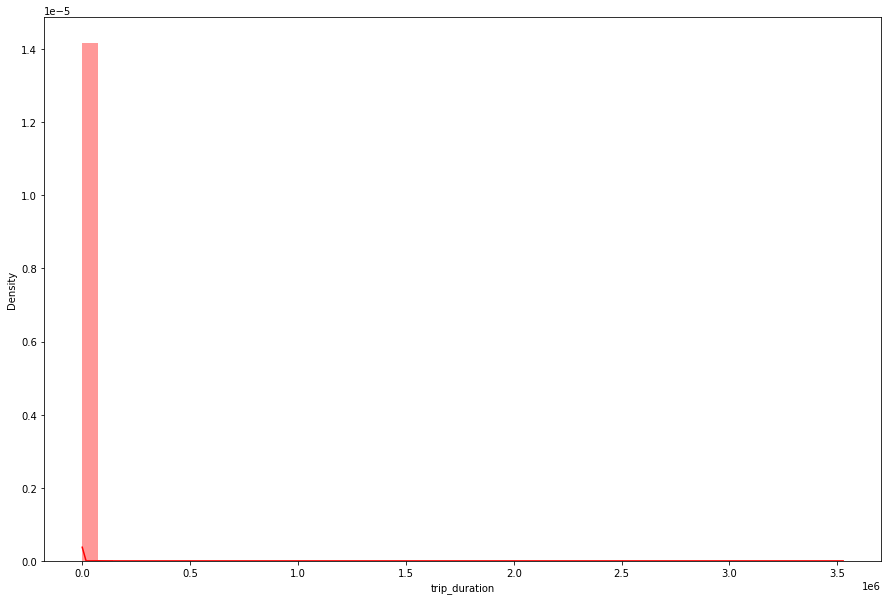

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(data1['trip_duration'],color="r")

so as we can see skewness in data (left skewed data) so we are using it ny log transformation to normaliaze the data


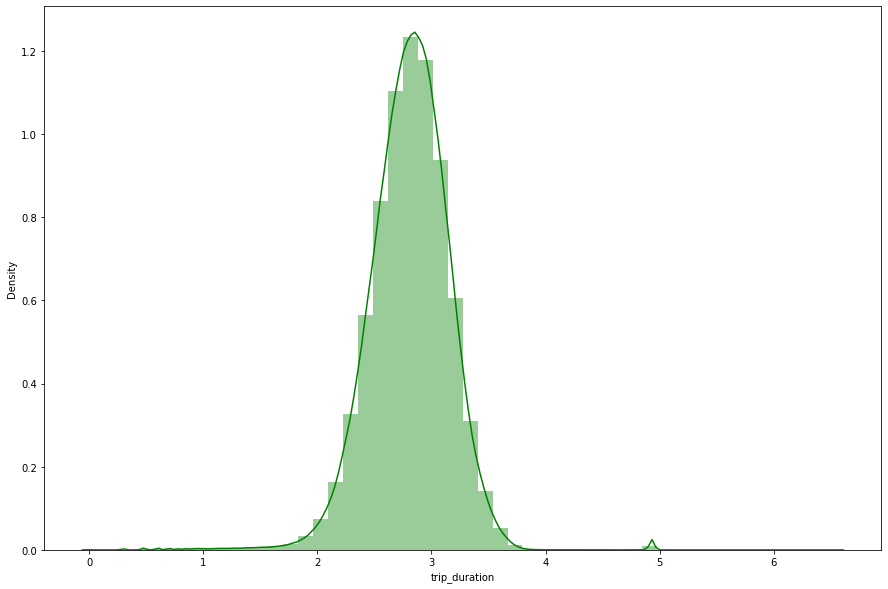

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(data1['trip_duration']),color="g")

So now let's plot a boxplot to detect the outliers 

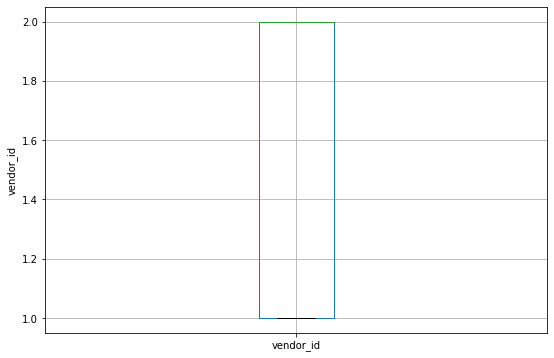

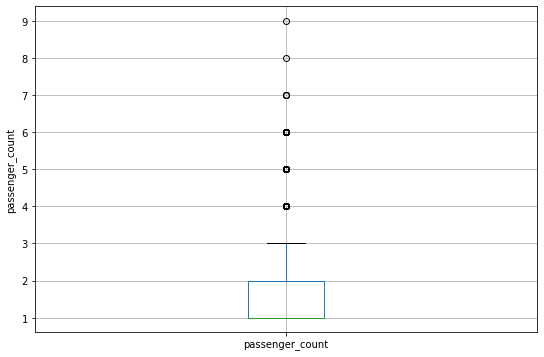

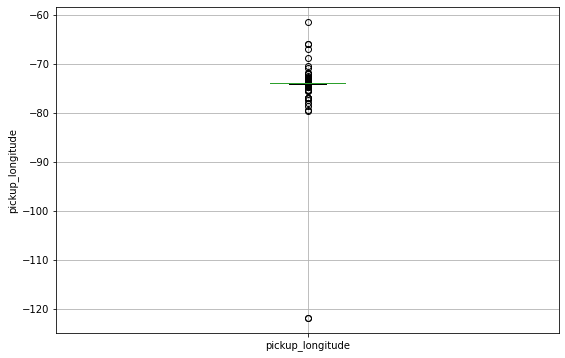

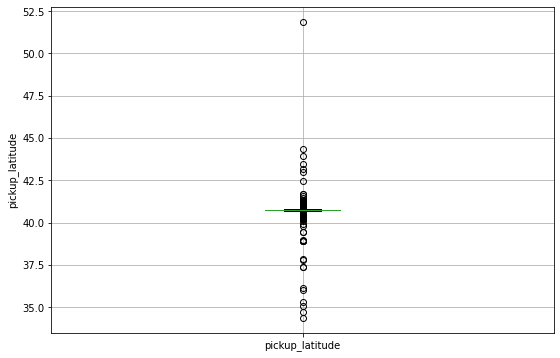

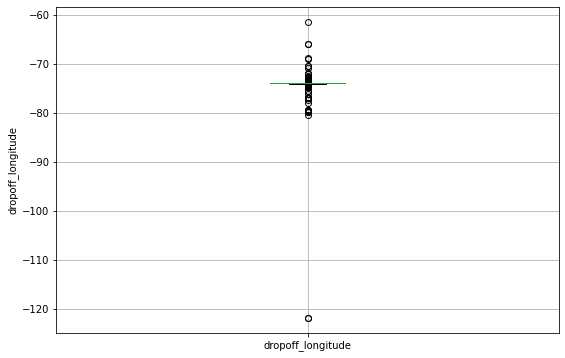

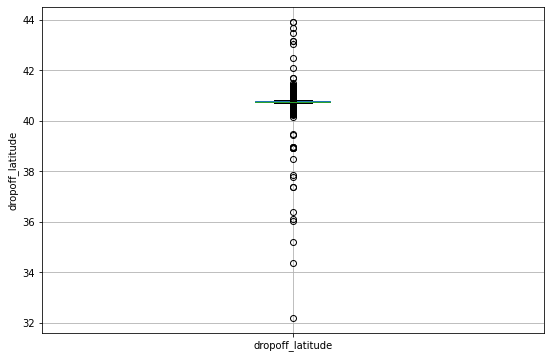

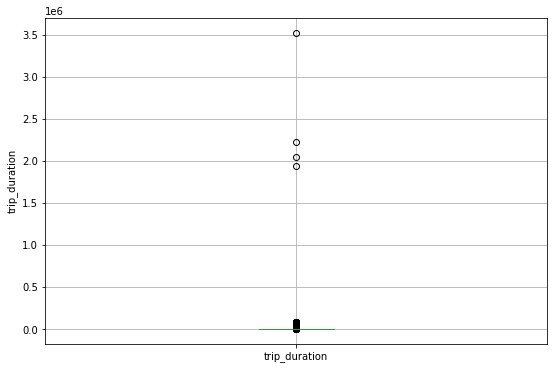

In [18]:
# plot a boxplot for the label by each numerical feature  
for col in data1.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  data1.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

From the above observation we can conclude that ;

vendor id has no outlier

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

In [19]:
numeric_features = data1.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

Let's plot a scatter plot as well to get more understanding of our feature

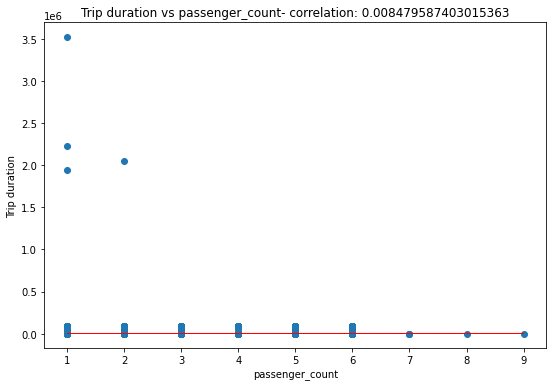

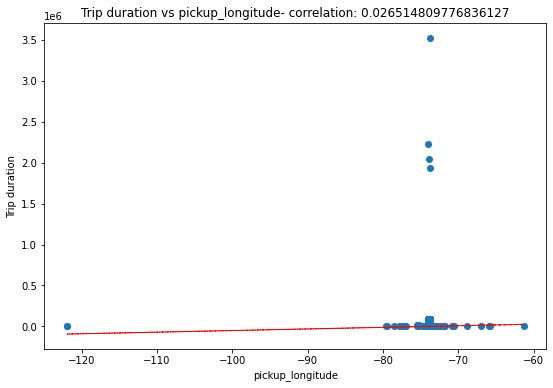

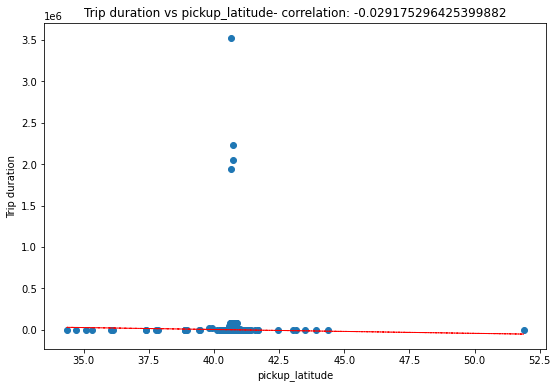

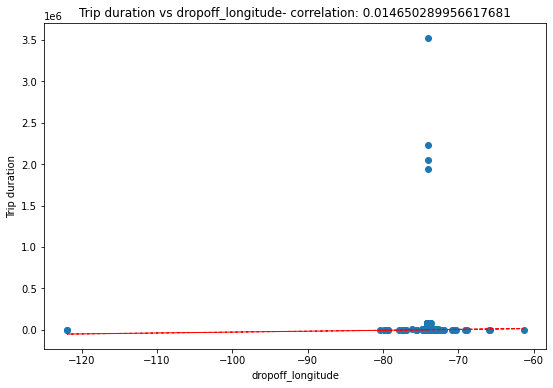

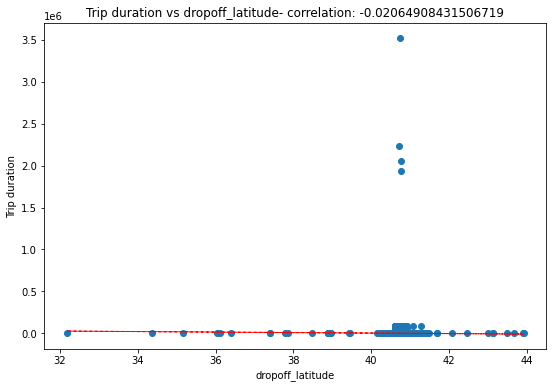

In [20]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data1[col]
    label = data1['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data1[col], data1['trip_duration'], 1)
    y_hat = np.poly1d(z)(data1[col])

    plt.plot(data1[col], y_hat, "r--", lw=1)

plt.show()

Here we are ploting scatter for pickup and dropoff locations 

Text(0.5, 1.0, 'Dropoff')

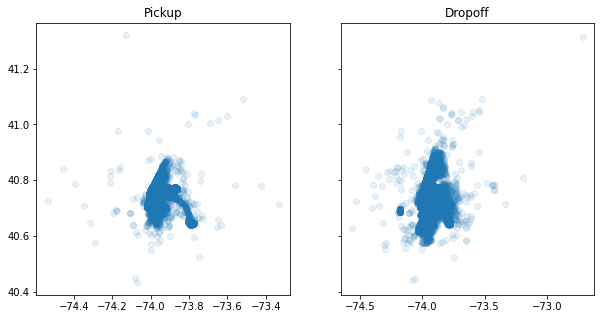

In [21]:
#plot to see the differences - minimal, but there is some change
n = 100000 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(data1.pickup_longitude[:n], 
            data1.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(data1.dropoff_longitude[:n], 
            data1.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

# **Feature Engineering**


We will make new columns for days of the week of their corresponging pickup and drop-off day

In [22]:
data1['pickup_day']=data1['pickup_datetime'].dt.day_name()
data1['dropoff_day']=data1['dropoff_datetime'].dt.day_name()
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Let's visualise our data and see which day is buisiest for the taxi drivers

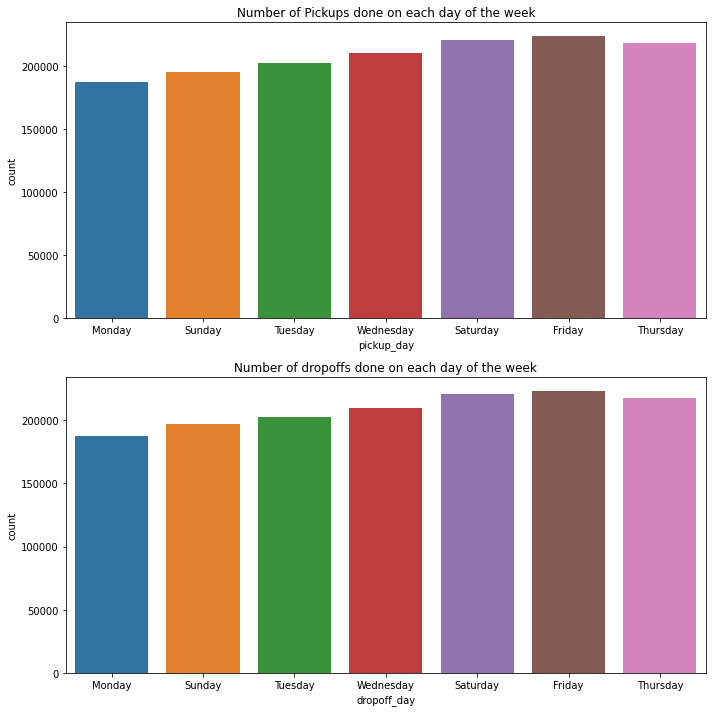

In [23]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data1,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=data1,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

As we can see from the above observations that Friday  is the most buisiest day and monday is least buisiest day and this also make sense because at weekends more peaople like to go out and to do party and at monday they have to earn their fiday spending

In [24]:
bins=np.array([0,1800,3600,5400,7200,90000])
data1['duration_time']=pd.cut(data1.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Now we are deviding the whole day in 4 parts "Morning 4am to 10am", "Midday 10am to 4pm ", "evening 4pm to 10 pm " , "late night 10pm to 4 am"

In [25]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
data1['pickup_timezone']=data1['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data1['dropoff_timezone']=data1['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

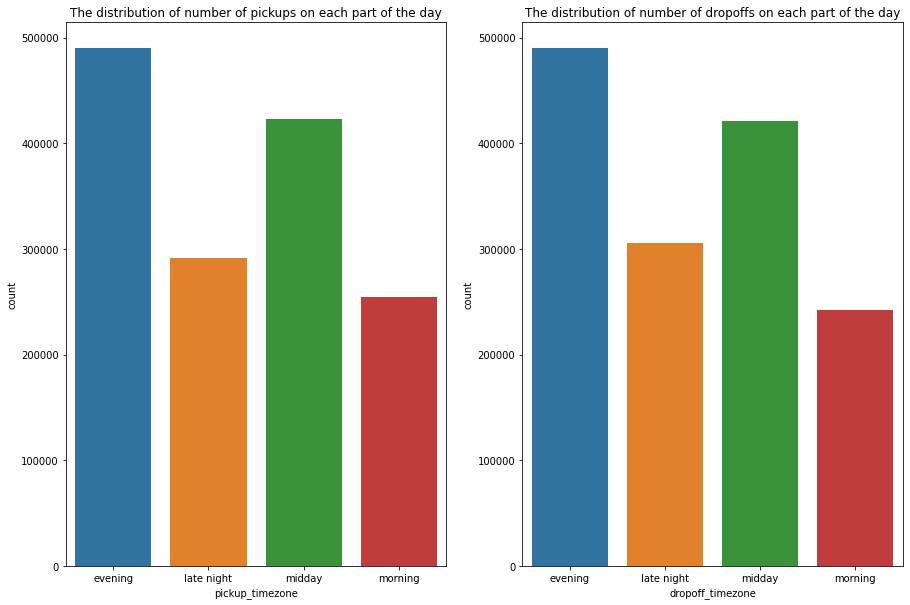

In [26]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=data1,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=data1,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

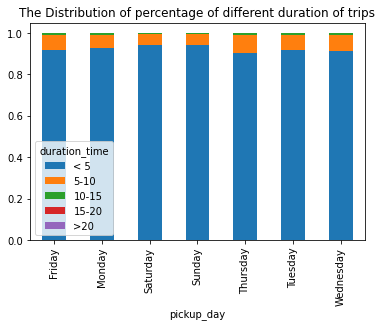

In [27]:
ax1=data1.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Calculating the distance using the given latitude and longitude

In [28]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [29]:
data1["distance"] = data1.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

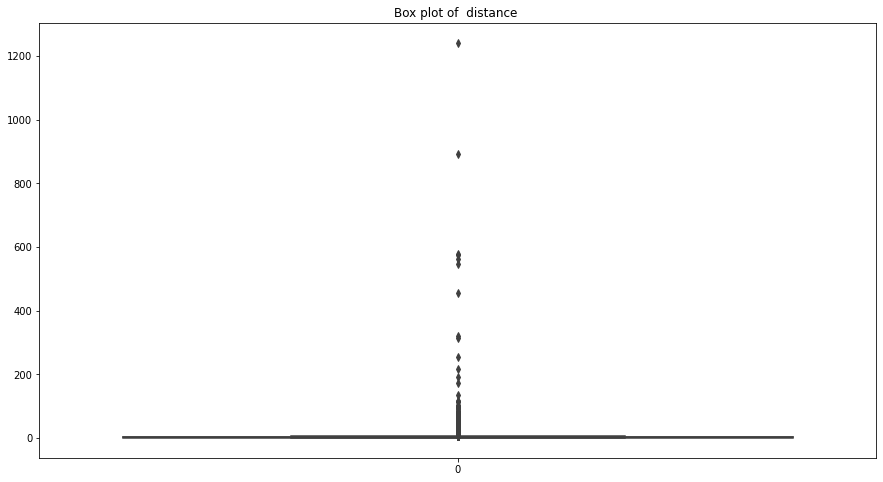

In [30]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=data1['distance'], orient="v")

Now for few variables we will remove outliers and plot the graphs for them

In [31]:
percentile_q1 = np.percentile(data1['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(data1['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(data1['distance'],75)
print(percentile_q3)

1.232295860862315
2.0944392378528622
3.8766616822922098


In [32]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [33]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.734252871282527
Upper limit for outlier  : 7.843210414437052


In [34]:
data1=data1[data1['distance']>lower_limit_outlier]
data1=data1[data1['distance']<upper_limit_outlier]

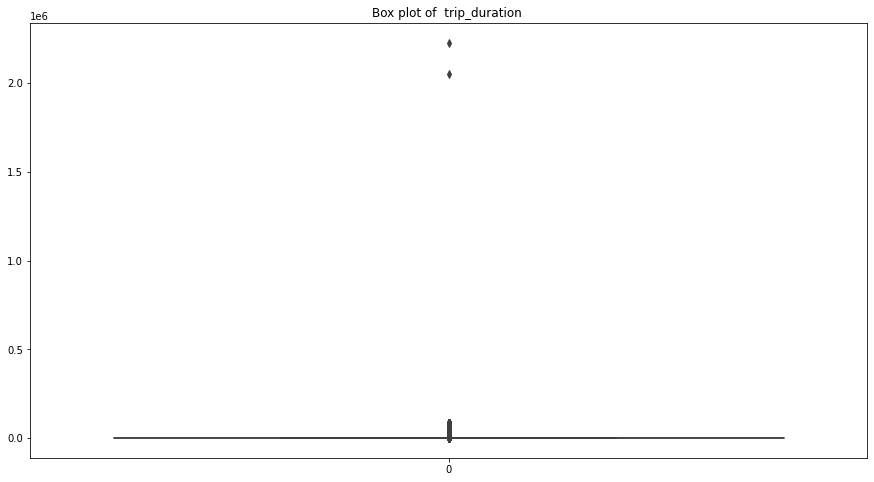

In [35]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=data1['trip_duration'], orient="v")

In [36]:
percentile_q1_trip_duration = np.percentile(data1['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(data1['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(data1['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [37]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

In [38]:
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [39]:
data1=data1[data1['trip_duration']>0]
data1=data1[data1['trip_duration']<upper_limit_outlier_trip_duration]

In [40]:
data1.shape

(1277345, 17)

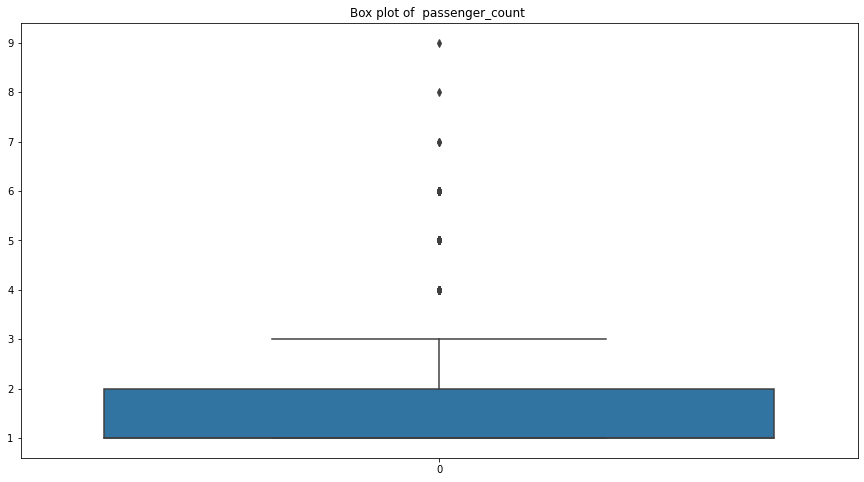

In [41]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=data1['passenger_count'], orient="v")

In [42]:
percentile_q1_passenger_count = np.percentile(data1['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(data1['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(data1['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [43]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

In [44]:
print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [45]:
data1=data1[data1['passenger_count']>0]
data1=data1[data1['passenger_count']<upper_limit_outlier_passenger_count]

In [46]:
data1.shape

(1142605, 17)

In [47]:
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,duration_time,pickup_timezone,dropoff_timezone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,< 5,evening,evening,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,< 5,late night,late night,1.806074
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,< 5,evening,evening,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,< 5,midday,midday,1.188962
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,Saturday,Saturday,< 5,morning,morning,5.716775


Now we will convert the datetime format and also convert trip duration in hours and apply log transformation on distance and trip duration

In [48]:
data1["pickup_datetime"] = pd.to_datetime(data1["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [49]:
data1['Day']=data1['pickup_datetime'].dt.day_name()

In [50]:
data1["year"] = data1["pickup_datetime"].apply(lambda x: x.year)
data1["month"] = data1["pickup_datetime"].apply(lambda x: x.month)
data1["day_num"] = data1["pickup_datetime"].apply(lambda x: x.day)
data1["hour"] = data1["pickup_datetime"].apply(lambda x: x.hour)
data1["minute"] = data1["pickup_datetime"].apply(lambda x: x.minute)

In [51]:
data1['trip_duration_hour']=data1['trip_duration']/3600
data1['log_distance']=np.log(data1.distance)
data1['log_trip_duration']=np.log(data1.trip_duration_hour)

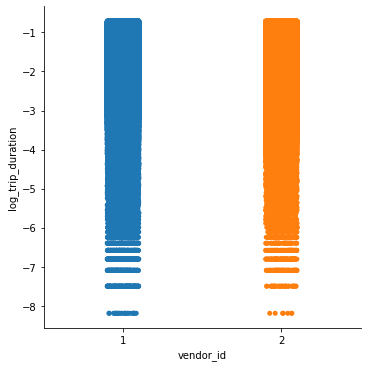

In [52]:
sns.catplot(x="vendor_id", y="log_trip_duration",kind="strip",data=data1)

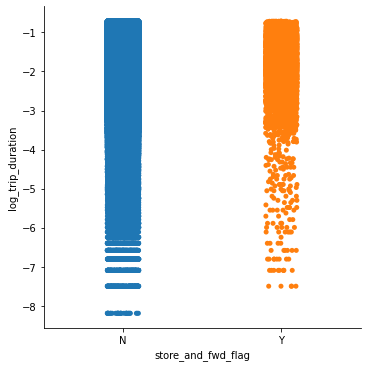

In [53]:
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=data1)

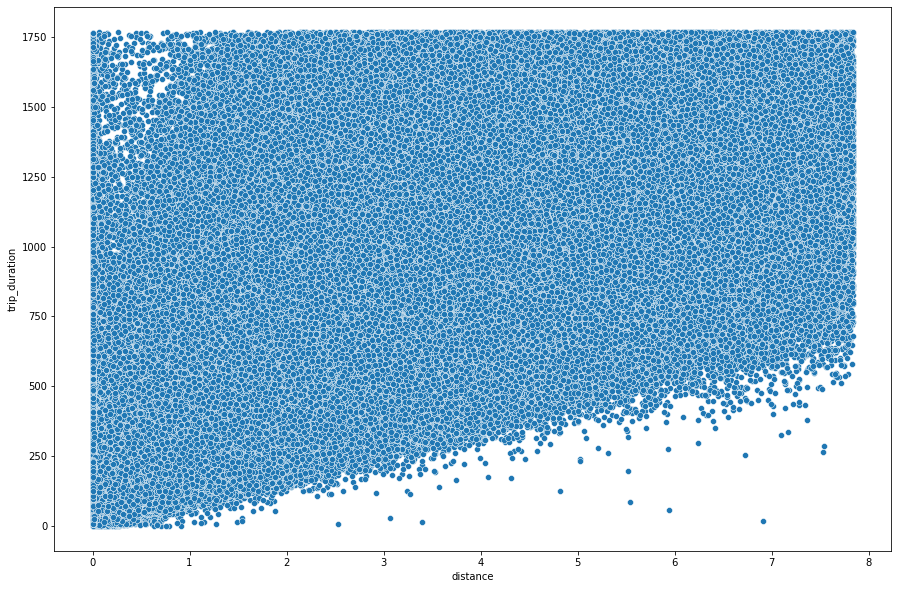

In [54]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=data1)

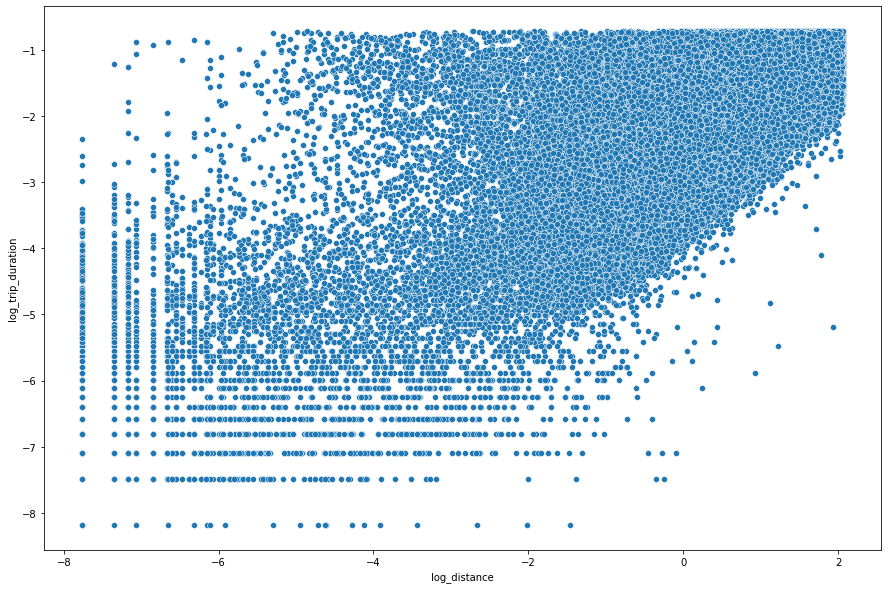

In [55]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data1)

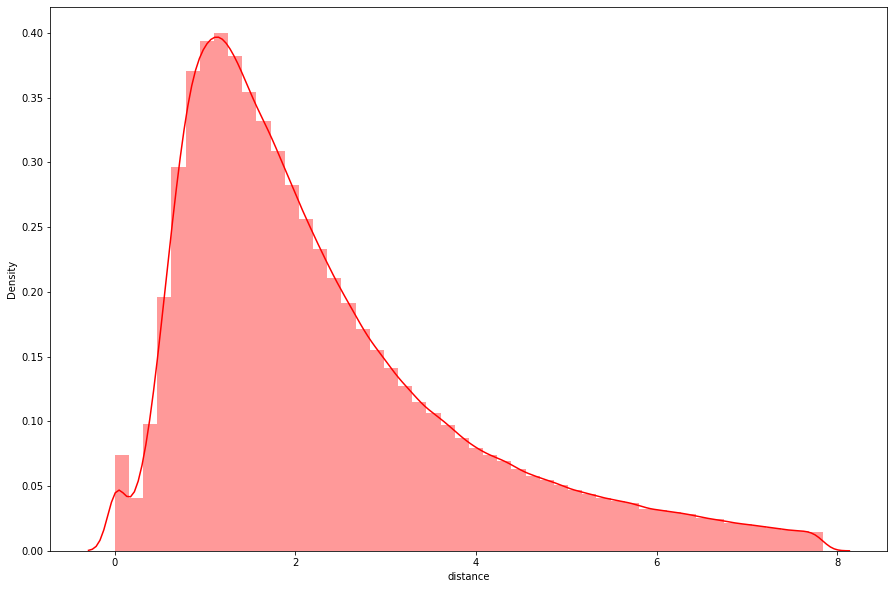

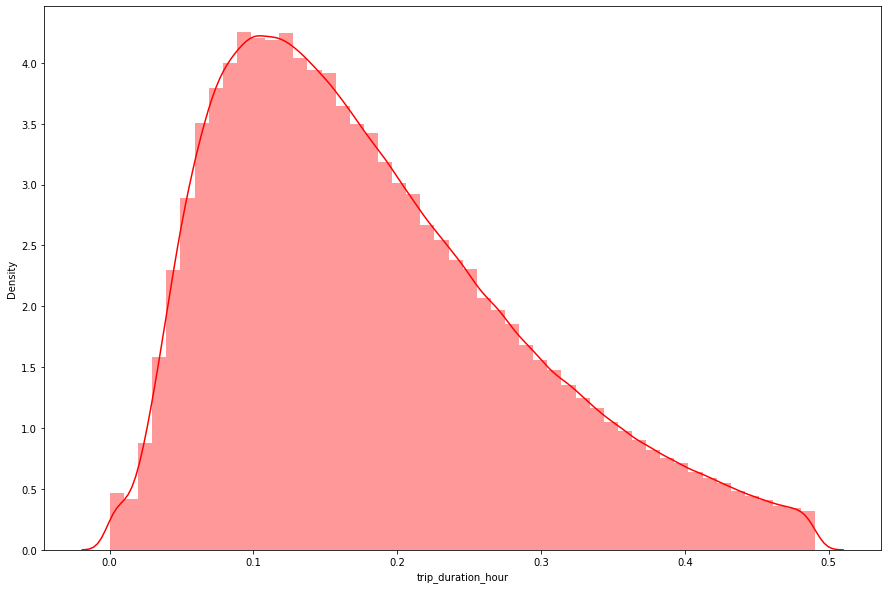

In [56]:
sample=['distance','trip_duration_hour']
for i in sample:
  plt.figure(figsize=(15,10))
  sns.distplot(data1[i],color="R")

# **One HotEncoding**

In [57]:
data1= pd.get_dummies(data1, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [58]:
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,dropoff_day,duration_time,pickup_timezone,dropoff_timezone,distance,year,month,day_num,hour,minute,trip_duration_hour,log_distance,log_trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,Monday,Monday,< 5,evening,evening,1.498991,2016,3,14,17,24,0.126389,0.404792,-2.068392,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,Sunday,Sunday,< 5,late night,late night,1.806074,2016,6,12,0,43,0.184167,0.591155,-1.691914,1,0,0,0,0,1,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,Wednesday,Wednesday,< 5,evening,evening,1.485965,2016,4,6,19,32,0.119167,0.396064,-2.127232,1,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,Saturday,Saturday,< 5,midday,midday,1.188962,2016,3,26,13,30,0.120833,0.173080,-2.113343,1,0,0,0,1,0,0,0,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,Saturday,Saturday,< 5,morning,morning,5.716775,2016,5,21,7,54,0.430833,1.743405,-0.842034,1,0,0,0,1,0,0,0,0


In [59]:
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [60]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_df=data1[newdata]

In [61]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = data1[features].apply(zscore)[:100000]
y=data1['trip_duration_hour'][:100000]

In [62]:
X[:5]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,hour,minute,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1.026271,-0.473673,-0.037634,0.555492,0.183837,0.423385,-0.506317,-0.297550,0.526366,-0.325740,0.072735,-0.072735,-0.424735,2.601165,-0.426811,-0.391903,-0.417208,-0.402328,-0.409478
1,-0.974402,-0.473673,-0.012904,-0.532264,-0.308598,-0.753038,-0.311467,1.488311,-2.138775,0.771428,0.072735,-0.072735,-0.424735,-0.384443,-0.426811,2.551649,-0.417208,-0.402328,-0.409478
3,1.026271,-0.473673,-0.434078,-1.220799,-0.489273,-1.587385,-0.514583,0.297737,0.839912,0.136225,0.072735,-0.072735,-0.424735,-0.384443,-0.426811,-0.391903,-0.417208,-0.402328,2.442131
4,1.026271,-0.473673,0.091766,1.491385,0.066658,1.001110,-0.703037,-0.297550,-0.100726,0.020734,0.072735,-0.072735,-0.424735,-0.384443,2.342959,-0.391903,-0.417208,-0.402328,-0.409478
7,1.026271,-0.473673,0.145457,1.660623,0.779546,0.251175,2.169953,0.893024,-1.041364,1.406630,0.072735,-0.072735,-0.424735,-0.384443,2.342959,-0.391903,-0.417208,-0.402328,-0.409478


In [63]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


In [65]:
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#Applying Linear Regression

In [66]:
reg = LinearRegression().fit(X_train, y_train)

In [67]:
reg.score(X_train, y_train)

0.4977717521753691

In [68]:
y_pred_train = reg.predict(X_train)

In [69]:
y_pred_test = reg.predict(X_test)

In [70]:
#Train set metrics
Ltr_MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE :" , Ltr_MSE)

Ltr_RMSE = np.sqrt(Ltr_MSE)

print("RMSE :" ,Ltr_RMSE)

Ltr_r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,Ltr_r2)
Ltr_ar2 = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",Ltr_ar2)

MSE : 0.005544800863815122
RMSE : 0.07446341963551716
R2 : 0.49777175217536906
Adjusted R2 :  0.4976524431392517


In [71]:
#Test set metrics
Lte_MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , Lte_MSE)

Lte_RMSE = np.sqrt(Lte_MSE)
print("RMSE :" ,Lte_RMSE)

Lte_r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,Lte_r2)
Lte_ar2 = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lte_ar2)

MSE : 0.0054712642758744994
RMSE : 0.07396799494291095
R2 : 0.49593024351436577
Adjusted R2 :  0.4954508979000902


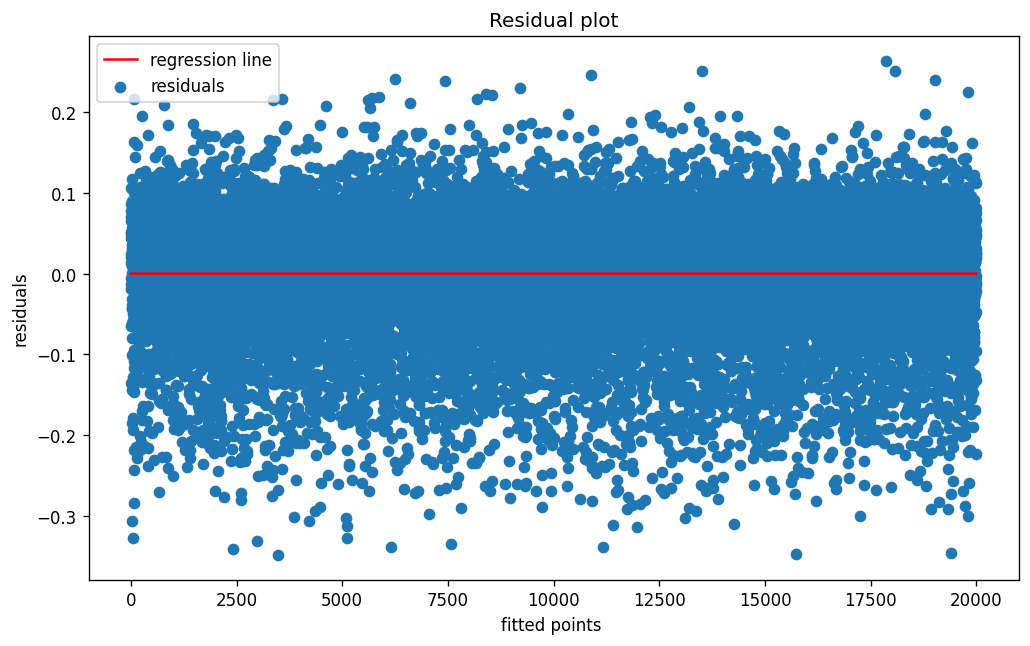

In [72]:
#Heteroskedasticity
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

# Implement Lasso Regression

In [73]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [74]:
lasso_regressor.score(X_train, y_train)

0.4977738411443353

In [109]:
print("The best fit alpha value is :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  0.4974340979499825


In [76]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [78]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.005544777800761662
Train RMSE : 0.07446326477372357
Train R2 : 0.4977738411443353
Train Adjusted R2 :  0.4976545326044721


In [79]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.005470898039694827
Test RMSE : 0.07396551926198333
Test R2 : 0.4959639849994403
Test Adjusted R2 :  0.495484671471662


# **Ridge Regression**

In [80]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [81]:
ridge_regressor.score(X_train, y_train)

0.49777368658851906

In [82]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  0.4974340979499825


In [83]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

In [85]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.005544779507119731
Train RMSE : 0.07446327623143996
Train R2 : 0.49777368658851906
Train Adjusted R2 :  0.4976543780119397


In [86]:
MSE  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.00547087496250748
Test RMSE : 0.07396536326218833
Test R2 : 0.4959661111099004
Test Adjusted R2 :  0.4954867996039489


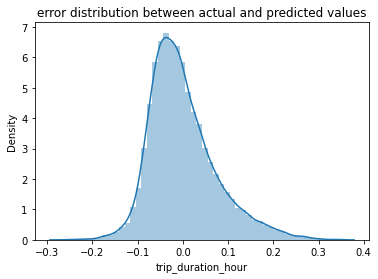

In [87]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

Implement Decision Tree Regressor 


In [104]:
# Maximum Depth of a tree
max_depth=[2,4,6,8]

# min samples required to split a node
min_samples_split=[10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf=[10,16,20]

# HyperParameter grid
params={
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}


In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [106]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid= GridSearchCV(estimator=dt_model,
                       param_grid = params,
                       cv =5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=2, min_samples_leaf=10, min

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   59.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split'

In [107]:
dt_grid.best_score_

0.5968392413635842

In [112]:
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [114]:
MSE  = mean_squared_error(y_test, y_pred)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.007327476390764318
Test RMSE : 0.08560067984989557
Test R2 : 0.32491668219473024
Test Adjusted R2 :  0.32427471107169226
